In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [3]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 6.5MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=7f55f3c51a6b183c3b8d5f8e68335e85b47a02c7192e63086fd3cae90e9d57fc
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 7.6MB/s 
     |████████████████████████████████| 983kB 6.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=d91cf445317bb48748145cfa0da8c29527745d7eedb05c45be7e009a495cc62a
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [4]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [6]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [7]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [8]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [9]:
#Importing Various twitter data

df_com = pd.read_json('pretty_gs_tweets_request.json')

df_feed = pd.read_json('pretty_ml_tweets_request.json')

df_req = pd.read_json('pretty_ms_tweets_request.json')

df_req1 = pd.read_json('pretty_jp_tweets_request.json')


In [10]:
df = pd.concat([df_com,df_feed,df_req, df_req1])

In [11]:
#Sentiment Analysis
#Vader Sentiment

In [12]:
analyzer = SentimentIntensityAnalyzer()

In [13]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [14]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [15]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [16]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

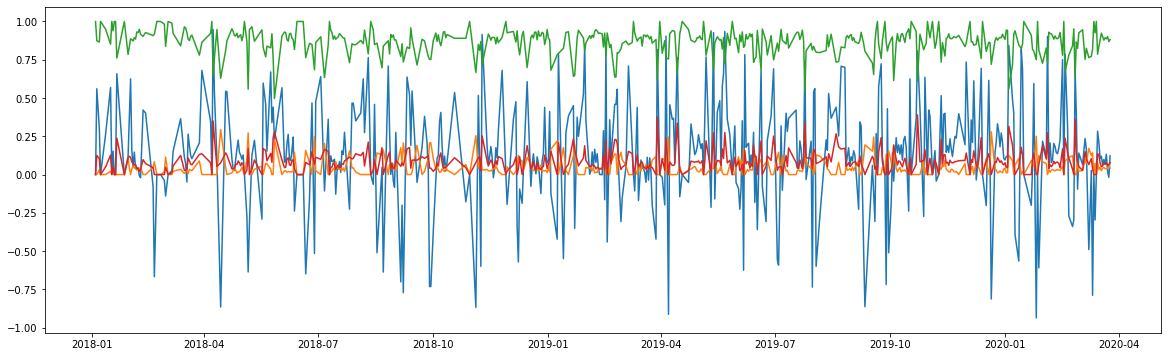

In [17]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [18]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'Hy Ann Coulter look - talk about Billion request - can you imagine How Goldman keeps supporting Maduro Goldman Sachs reaps $90 million payout on Venezuela bonds https://on.mktw.net/2H8wMwH\xa0'

In [19]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'The people have spoken...\n"Goldman Sachs decided to open a Bitcoin-trading platform after being inundated by requests to do so from its clients." #Bitcoin #BlockchainIsTheFuture\nhttp://ow.ly/fpY530kHkvI\xa0pic.twitter.com/tJl5ccjPTn'

Text(0, 0.5, 'Sentiment')

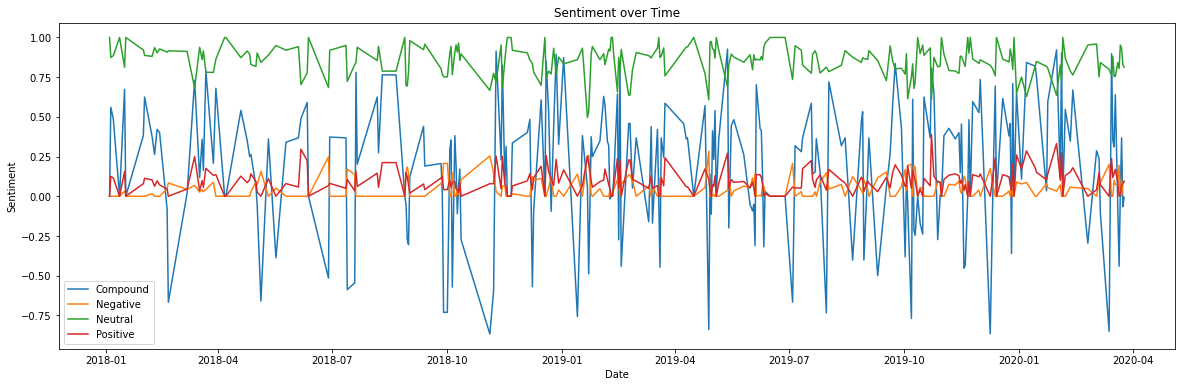

In [20]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

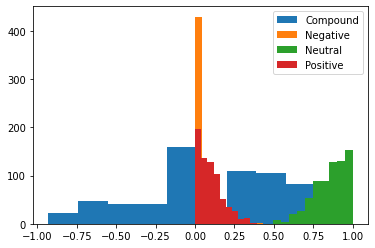

In [21]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

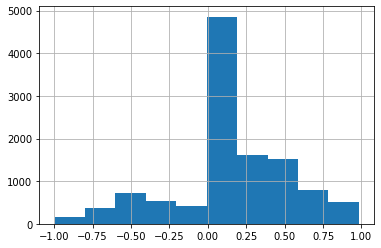

In [22]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [23]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.903,0.097,0.4404
1,0.888,0.079,0.3197
2,1.000,0.000,0.0000
3,0.808,0.000,-0.4215
4,0.811,0.142,0.5445
...,...,...,...
518,0.776,0.224,0.8442
519,0.927,0.073,0.0516
520,0.884,0.000,-0.5775
521,0.812,0.081,-0.2960


In [24]:
#Importing Various twitter data

df_com = pd.read_json('pretty_gs_tweets_request.json')

df_feed = pd.read_json('pretty_ml_tweets_request.json')

df_req = pd.read_json('pretty_ms_tweets_request.json')

df_req1 = pd.read_json('pretty_jp_tweets_request.json')


In [25]:
df = pd.concat([df_com,df_feed,df_req, df_req1])

In [26]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 8.9MB/s 
     |████████████████████████████████| 552kB 49.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=adeea6debfc9227e7c1e8e4db9900038c9a12add9dd3d167ff4ef425288d39c6
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=ce7a93d1bf350ac48949fcb2e6b7841b3695ae80542e51e616f431d2d832bbef
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [27]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [28]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(11509, 2382)


In [29]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [30]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [31]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [32]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,False,0,[https://on.mktw.net/2H8wMwH],,0,[],0,atrustynote,Hy Ann Coulter look - talk about Billion reque...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 20:14:02,2018-04-30 20:14:02,991048049043693568,/atrustynote/status/991048049043693569,937129917497724928,dale trusty,,0.000,0.903,0.097,0.4404
1,False,[dogmauling2016],[],True,False,137,[],,7,[],10,AngryBlackLady,Finally filed my request for a default judgmen...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 17:47:56,2018-04-30 17:47:56,991011281900658688,/AngryBlackLady/status/991011281900658688,46822887,Imani Gandy ☄️🌏🔥,,0.033,0.888,0.079,0.3197
2,False,[],[],False,False,0,[http://www.booklending.com/~B07BVBJ5WK],,0,[],0,BLFeed,REQUEST: Princess From the Bronx by Kate Goldm...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-29 14:19:24,2018-04-29 14:19:24,990596416706883584,/BLFeed/status/990596416706883584,236073812,BookLending.com,,0.000,1.000,0.000,0.0000
3,True,"[hashgraph, blockchain, techpic]",[https://pbs.twimg.com/media/DbkC39OW0AAETrx.jpg],False,False,1,[],,0,[],0,michael_goldman,No license required for usage of @hashgraph bu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-24 16:59:29,2018-04-24 16:59:29,988824763446505472,/michael_goldman/status/988824763446505473,44579340,Michael Goldman,,0.192,0.808,0.000,-0.4215
4,False,[],[],False,True,0,[],986335537568116737,0,"[{'screen_name': 'davidhogg111', 'user_id': '1...",0,B1GTEN01,What about Fidelity or Goldman Sachs? Where’s ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-18 13:40:48,2018-04-18 13:40:48,986600435577442304,/B1GTEN01/status/986600435577442304,885566995084824576,JFK,,0.048,0.811,0.142,0.5445


In [33]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [34]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.105183 -0.016520       1        1  14.025068
0     -0.385175  0.030200       2        1  12.391380
6      0.125277  0.077608       3        1  11.401111
5     -0.295276  0.017692       4        1   9.929566
2      0.127159  0.004827       5        1   9.460042
7      0.089774 -0.259698       6        1   9.311148
4      0.134983  0.066633       7        1   8.825299
1      0.119368  0.015751       8        1   8.601279
9     -0.146114 -0.047134       9        1   8.315236
3      0.124823  0.110641      10        1   7.739870, topic_info=           Term        Freq       Total Category  logprob  loglift
863      result  129.000000  129.000000  Default  30.0000  30.0000
1010  surprised  129.000000  129.000000  Default  29.0000  29.0000
178     changed  130.000000  130.000000  Default  28.0000  28.0000
822      rating  130.000000  130.000000  Default  27.0000  27.0000
457      health   55.000000   55.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
114         bit    8.281402   44.288656  Topic10  -4.8986   0.8821
489       https    9.456339  143.656197  Topic10  -4.7659  -0.1620
488        http    9.202356  134.511259  Topic10  -4.7932  -0.1234
90         bank    8.218037  161.576304  Topic10  -4.9063  -0.4199
33      america    7.568200  147.428372  Topic10  -4.9887  -0.4106

[580 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         4  0.981139       aapl
1         2  0.979126       aaxn
5         1  0.468367  according
5         3  0.234183  according
5         4  0.093673  according
...     ...       ...        ...
1155      5  0.156109      years
1155      7  0.273191      years
1155      8  0.039027      years
1155      9  0.039027      years
1158      1  0.841194      yield

[1156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 7, 6, 3, 8, 5, 2, 10, 4])

In [35]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.108926  0.044203       1        1  14.608322
7     -0.082560  0.049014       2        1  12.118895
9     -0.094922  0.108326       3        1  12.102348
1     -0.077818  0.083071       4        1   9.623010
5     -0.006157 -0.312428       5        1   9.558910
8     -0.107006 -0.037810       6        1   9.114855
4      0.337378  0.027417       7        1   8.802916
6     -0.096695 -0.001514       8        1   8.151408
2     -0.037944  0.002133       9        1   8.111647
0      0.274649  0.037589      10        1   7.807688, topic_info=          Term       Freq      Total Category  logprob  loglift
454     rating  52.000000  52.000000  Default  30.0000  30.0000
147       cuts  35.000000  35.000000  Default  29.0000  29.0000
102    changed  31.000000  31.000000  Default  28.0000  28.0000
544  surprised  31.000000  31.000000  Default  27.0000  27.0000
471     result  31.000000  31.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
471     result  10.259312  31.054378  Topic10  -3.8261   1.4425
102    changed  10.240279  31.220594  Topic10  -3.8279   1.4353
393        net   7.556796  20.543017  Topic10  -4.1318   1.5500
366     market  10.026208  45.492407  Topic10  -3.8490   1.0377
288       http   5.728303  75.004687  Topic10  -4.4088  -0.0221

[492 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         7  0.849793       aaxn
1         5  0.717891  abgestuft
3         1  0.132108  according
3         3  0.396324  according
3         7  0.132108  according
...     ...       ...        ...
623       9  0.124017      years
624       1  0.171652       york
624       5  0.686606       york
624       6  0.085826       york
625       5  0.928360       ziel

[874 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 10, 2, 6, 9, 5, 7, 3, 1])

In [36]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.115601  0.038994       1        1  13.915155
2     -0.061891  0.024281       2        1  12.428700
6      0.371037  0.165411       3        1  11.885938
8     -0.087942  0.046482       4        1  11.520157
9     -0.091195 -0.006672       5        1   9.432109
1     -0.018930 -0.006099       6        1   8.724230
0     -0.058347  0.050701       7        1   8.365654
4      0.131929 -0.360259       8        1   8.110288
7     -0.037052  0.000581       9        1   8.058669
3     -0.032007  0.046578      10        1   7.559098, topic_info=        Term        Freq       Total Category  logprob  loglift
441  karauri  175.000000  175.000000  Default  30.0000  30.0000
443    kikan  167.000000  167.000000  Default  29.0000  29.0000
199     date  167.000000  167.000000  Default  28.0000  28.0000
529      net  179.000000  179.000000  Default  27.0000  27.0000
707      son   52.000000   52.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
59      bank   13.750455  240.661748  Topic10  -4.1729  -0.2799
161      com   13.461084  254.207671  Topic10  -4.1941  -0.3559
29   america   13.009667  230.378294  Topic10  -4.2282  -0.2916
372     http    9.419120  183.898775  Topic10  -4.5512  -0.3892
779  twitter    8.213642  182.175237  Topic10  -4.6881  -0.5168

[519 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         4  0.918944        aapl
1         7  0.855707        aaxn
3         6  0.810563  accidental
6         4  0.827138     account
6        10  0.150389     account
...     ...       ...         ...
839       3  0.075636        york
839       5  0.151272        york
839       7  0.756362        york
840       7  0.950892     youtube
841       8  0.957639        ziel

[790 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 7, 9, 10, 2, 1, 5, 8, 4])

In [37]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(4692, 25)
(2162, 25)
(4655, 25)
